In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set higher resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [4]:
spotify_filepath = "../data/datavis/spotify.csv"
spotify_data = pd.read_csv(spotify_filepath,
                           index_col="Date",
                           parse_dates=True)

In [5]:
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


In [10]:
# most played song
spotify_data.sum().idxmax()

'Despacito'

<AxesSubplot:title={'center':'Dayly Global Streams of Popular Songs'}, xlabel='Date'>

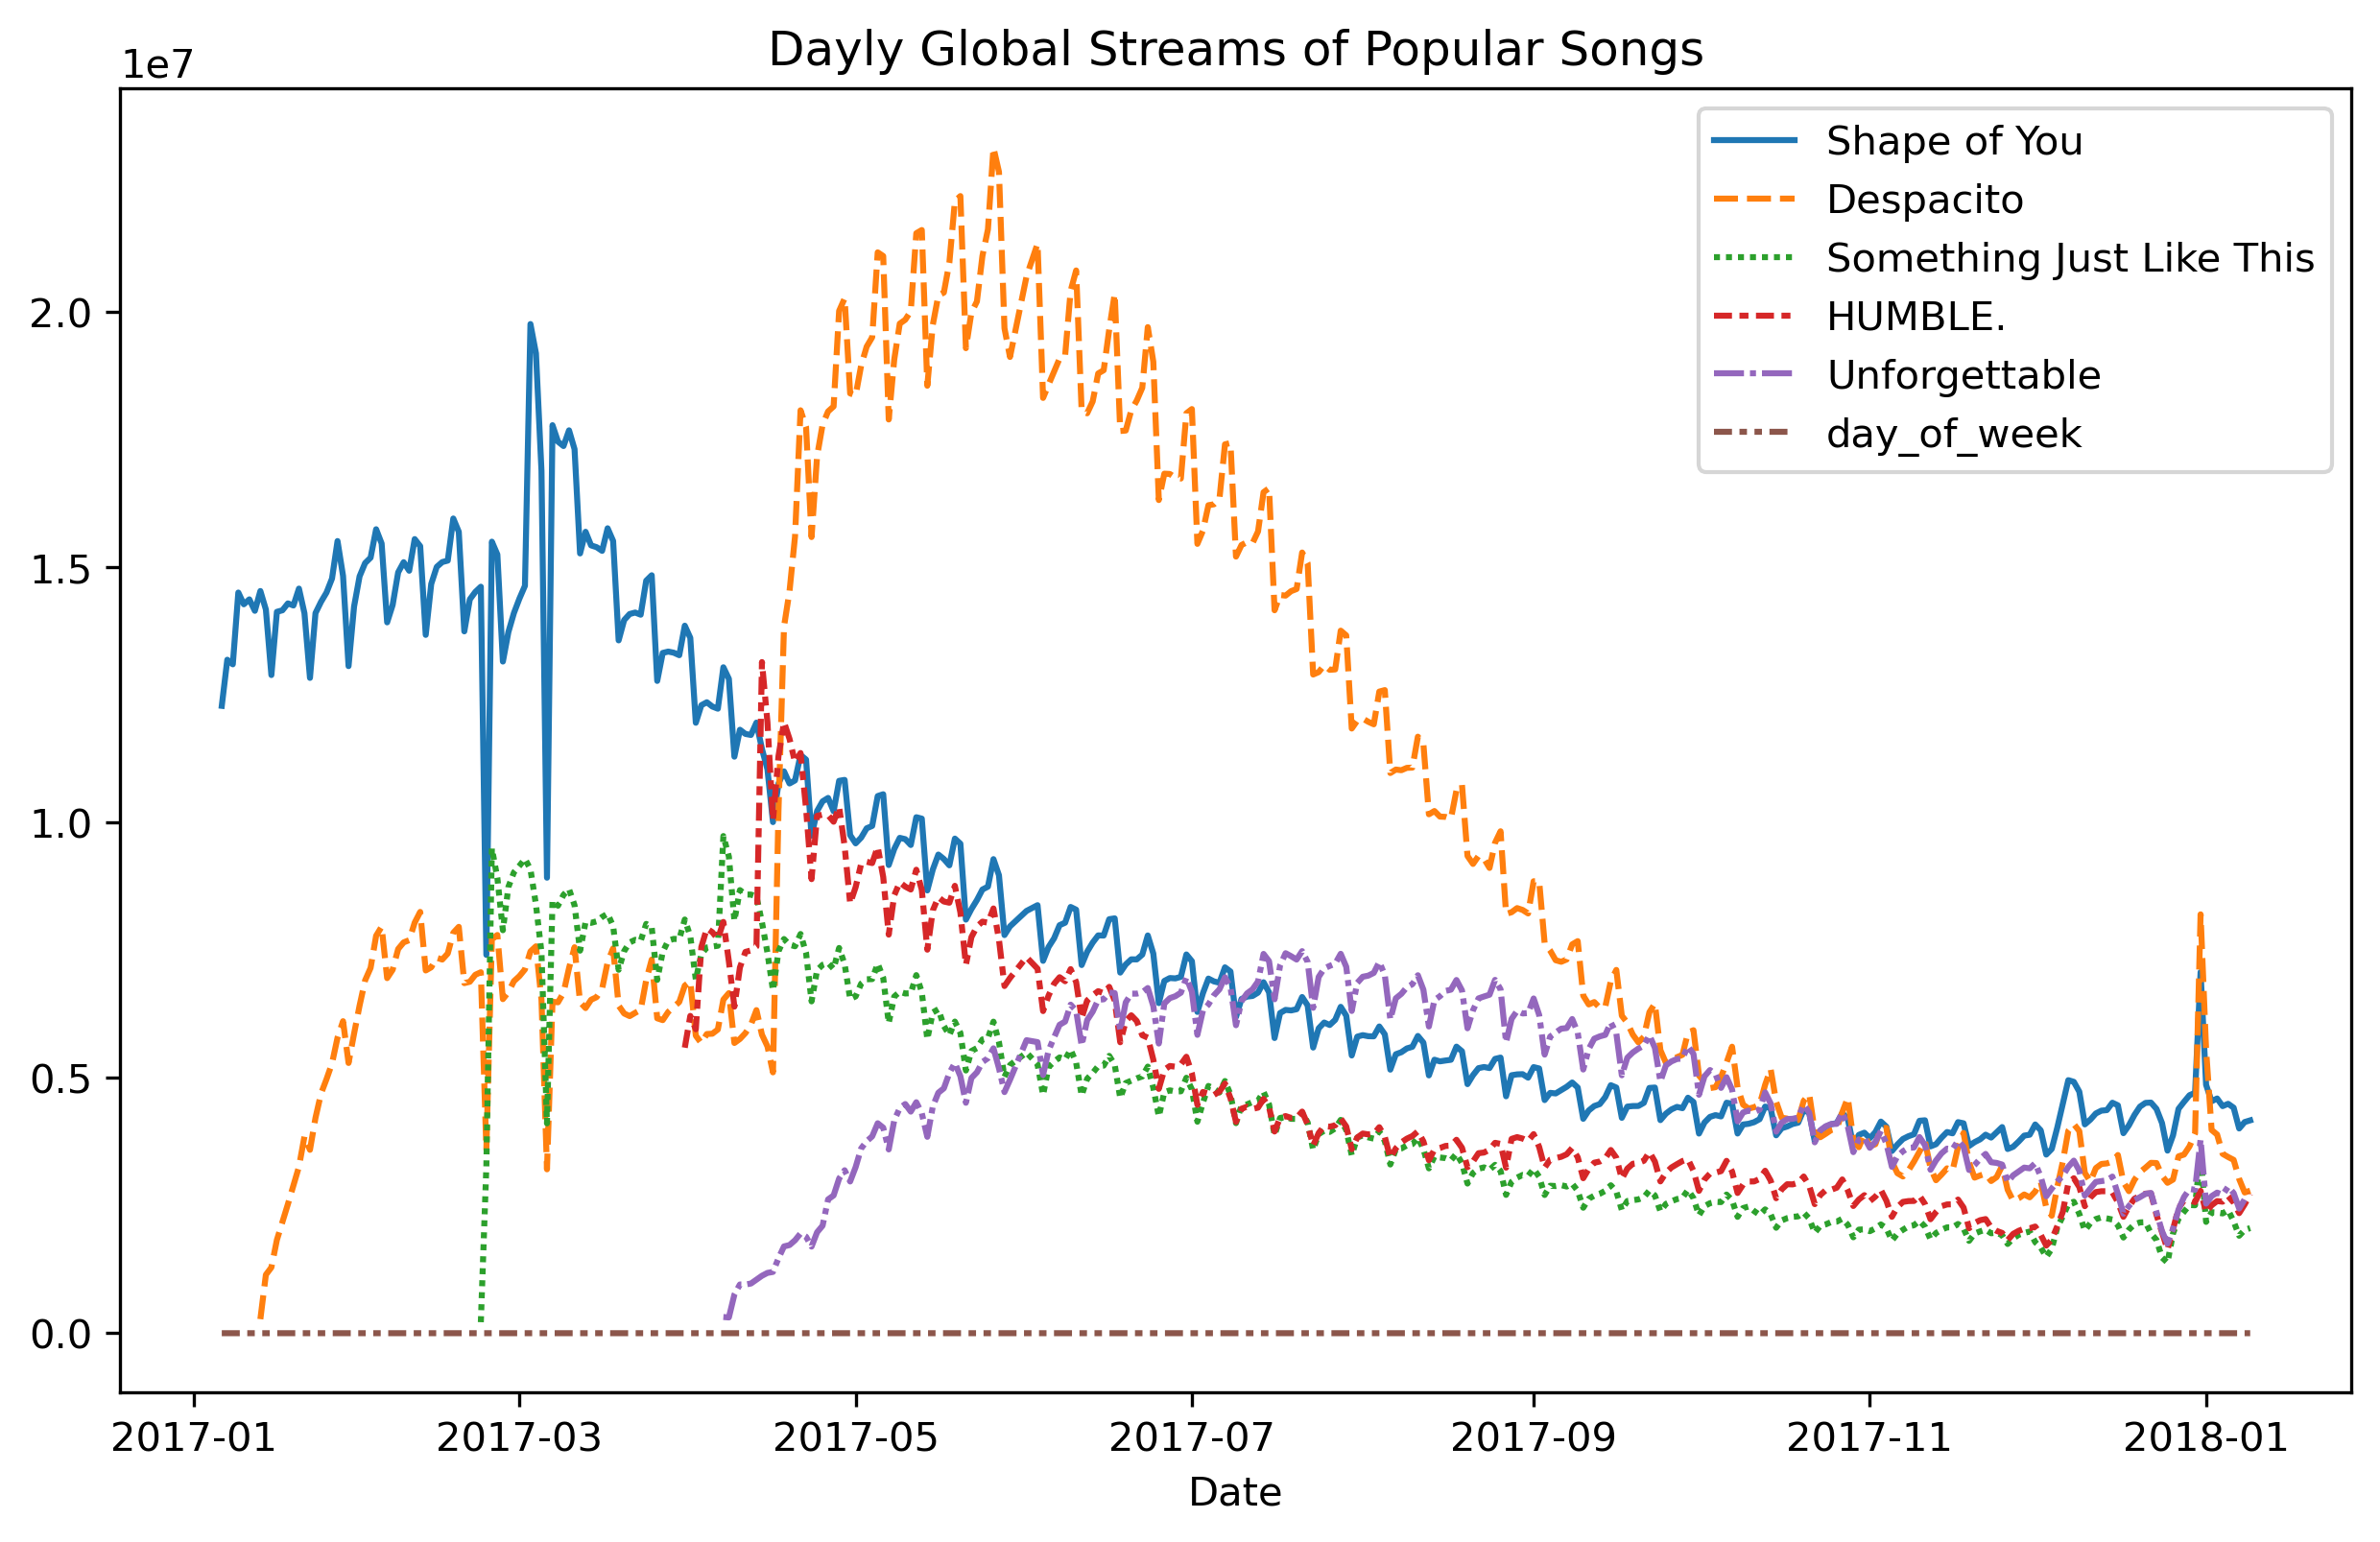

In [25]:
# set figure size
plt.figure(figsize=(10,6))

# set figure title
plt.title("Dayly Global Streams of Popular Songs")


# seaborn summary plot
sns.lineplot(data=spotify_data)


----------------
## Weekend Effect

I noticed there looks like there might be a weekend effect.
I will explore this further

In [38]:
# add a day of the week column
spotify_data["day_of_week"] = spotify_data.index.dayofweek
spotify_data.day_of_week = spotify_data.day_of_week.replace(0,7)
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable,day_of_week
Date,,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN,4
2017-01-07,13190270,NaN,NaN,NaN,NaN,5
2017-01-08,13099919,NaN,NaN,NaN,NaN,6
2017-01-09,14506351,NaN,NaN,NaN,NaN,7
2017-01-10,14275628,NaN,NaN,NaN,NaN,1


In [43]:
streams_dow = spotify_data.groupby('day_of_week').sum()
streams_dow

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
day_of_week,,,,,
1,420786104,449247317.0,195258381.0,184940447.0,182314019.0
2,419840938,452399293.0,194500139.0,182832437.0,182712988.0
3,421983978,475629842.0,203478728.0,190329504.0,189928252.0
4,454815871,489640411.0,211475578.0,199537051.0,192103353.0
5,456719537,517221153.0,206647558.0,195175177.0,190546481.0
6,405926310,451667643.0,183147665.0,172592557.0,169720651.0
7,413916045,454717788.0,191750246.0,185836572.0,181825146.0


In [46]:
# normalising columns
for c in streams_dow.columns : 
    streams_dow[c] = streams_dow[c]/streams_dow[c].sum()
    
streams_dow

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
day_of_week,,,,,
1,0.140544,0.136528,0.140853,0.141042,0.141422
2,0.140228,0.137486,0.140306,0.139434,0.141731
3,0.140944,0.144545,0.146783,0.145152,0.147328
4,0.151910,0.148803,0.152551,0.152174,0.149015
5,0.152546,0.157185,0.149069,0.148847,0.147808
6,0.135580,0.137263,0.132117,0.131625,0.131653
7,0.138249,0.138190,0.138322,0.141725,0.141043


<AxesSubplot:title={'center':'Streams by Day of the Week'}, xlabel='day_of_week'>

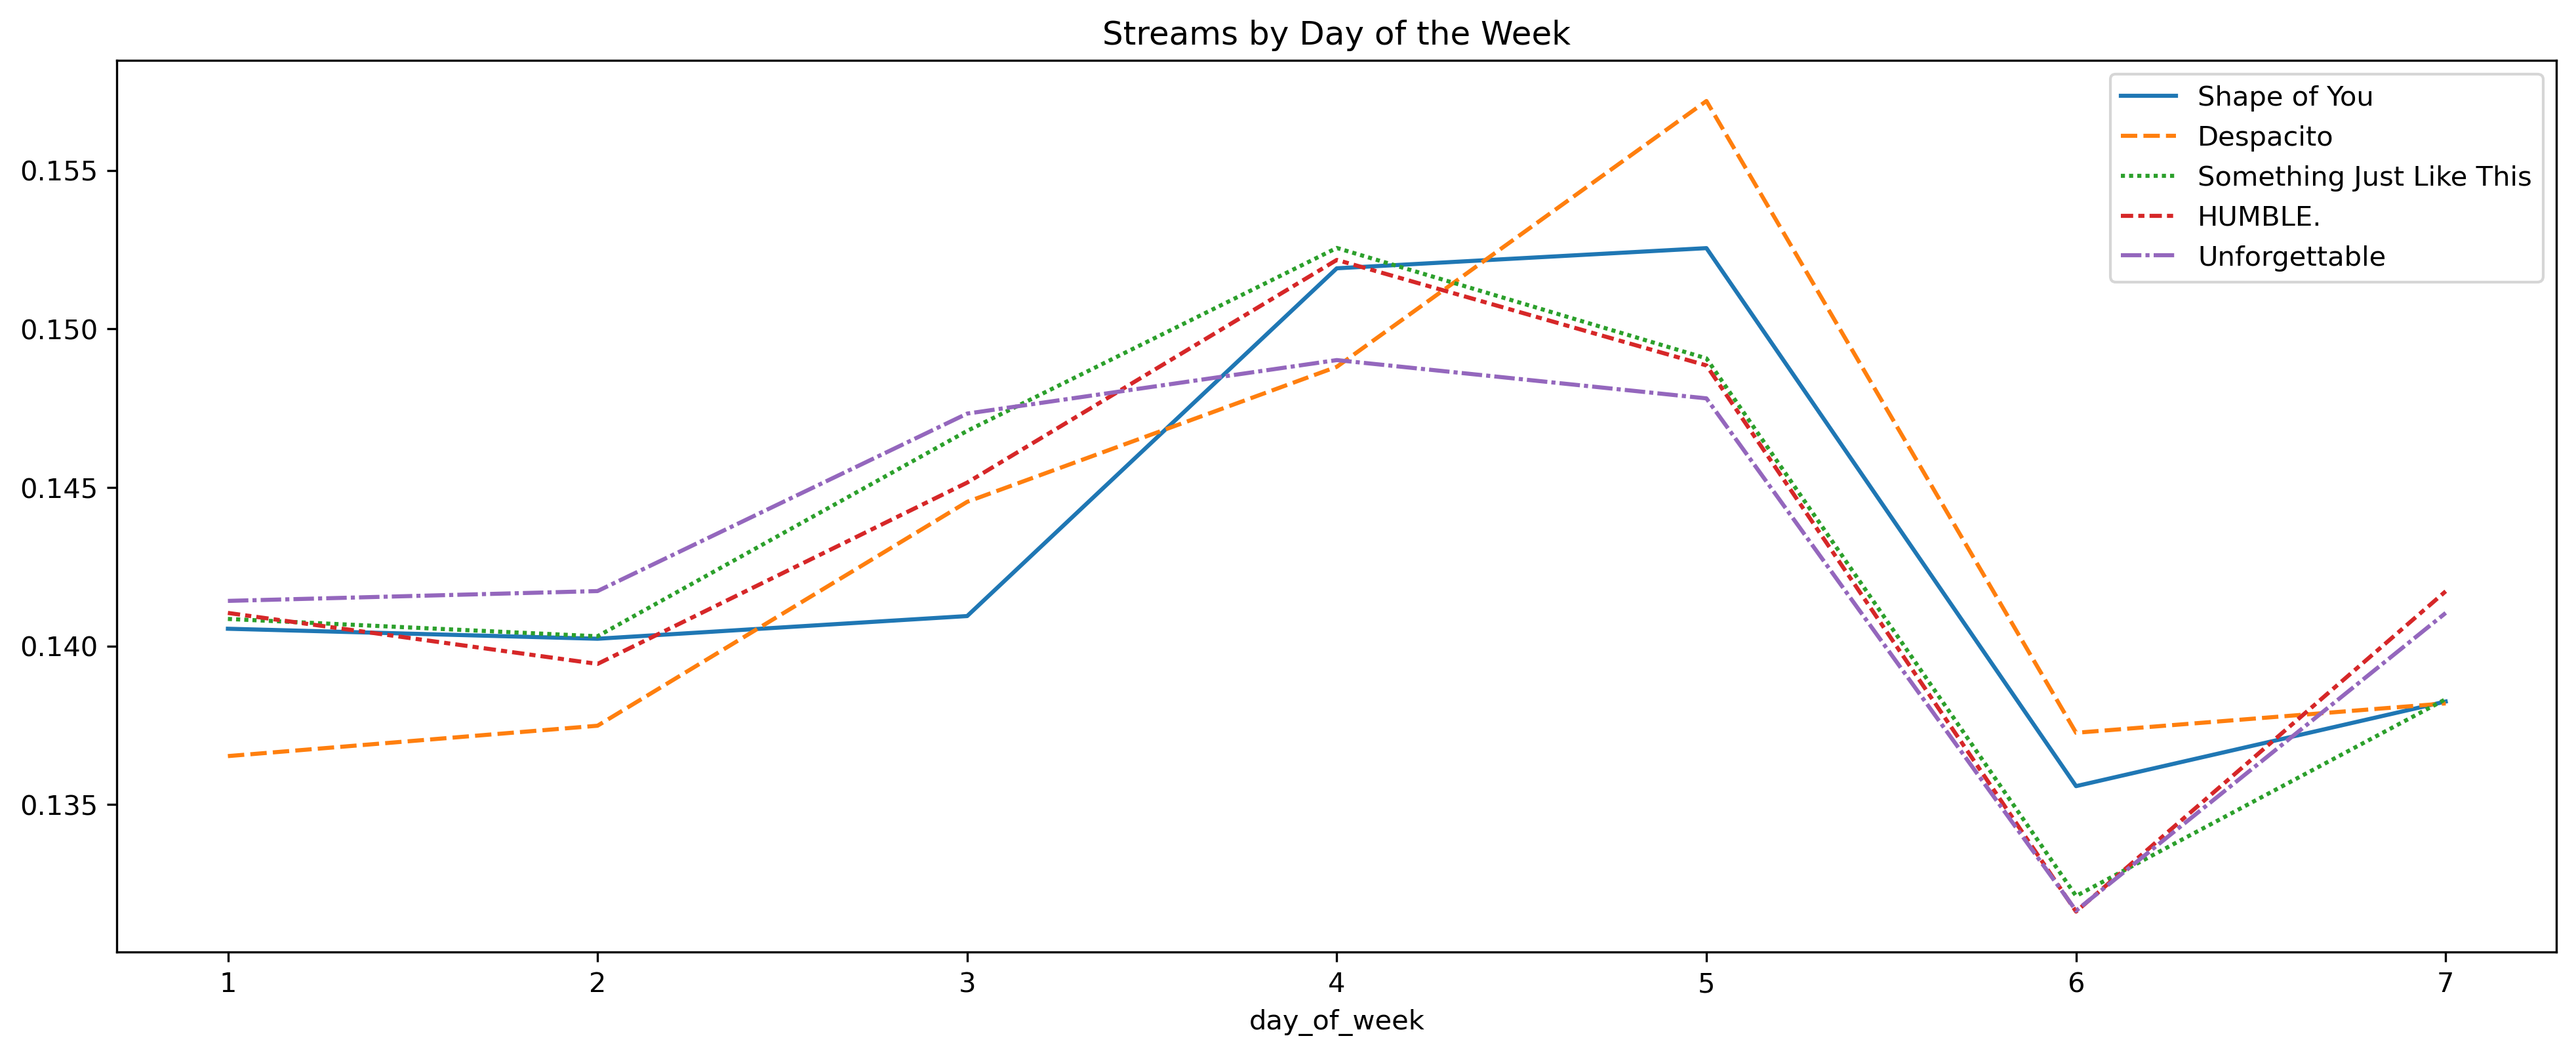

In [48]:
# set fig size
plt.figure(figsize=(16,6))
plt.title("Streams by Day of the Week")
sns.lineplot(data=streams_dow)

There is a pretty clear "weekend effect".
Peole tend to listen to the songs more on thursday and friday, approaching the weekend, and listen less on saturday, presumably when busy.